# Assignment 2
# The Magic of Mushrooms : A Fable of Dimensionality Reduction

## Name : S SHRIPRASAD
## Roll No : DA25E054



---

## Objective: 
### The Fable Begins:

In the enchanted forest of data, a patch of mushrooms has sprouted, each described by a whisper of cryptic features. Some are life-giving, others are deadly poison. To the naked eye, the forest is a tangled, high-dimensional thicket where the safe and the sinister look alike.

Our fable is one of magical transformation. We will use a powerful enchantment known as Principal Component Analysis (PCA) to cast a clarifying light upon this forest. Our spell will not destroy the thicket but reveal its hidden, simpler pathways. Then, a wise sage—Logistic Regression—will walk these paths to see if the magic has truly made the forest navigable, separating the wholesome from the wicked with ease.



---
## Part A: Brewing the Potion - EDA & Preprocessing
Before any great spell can be cast, the alchemist must gather and purify the ingredients. This is our preparation phase, where we take the raw, chaotic data and brew it into a form pure enough for our analytical magic.

### 1. Sourcing the Ingredients
First, we summon the essential scrolls and artifacts—our Python libraries—for the ritual ahead.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

sns.set_style('whitegrid')
sns.set_palette("colorblind") 
plt.rcParams['figure.figsize'] = (10, 6)

Next, we examine the raw mushrooms themselves, inspecting their nature and form.


In [2]:
df = pd.read_csv('mushrooms.csv')
print("Dataset Head:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset Head:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-col

The language of the forest is one of symbols and words ('p' for poisonous, 'b' for bell-shaped). But our spell, PCA, is an ancient rune that only understands the language of numbers. To begin our enchantment, we must first translate.

### The Spell of Transformation: One-Hot Encoding
This is our first act of alchemy. One-Hot Encoding transforms each symbolic feature into a numerical one (0 or 1). This transmutes the descriptive words into a high-dimensional numerical essence, creating a "vector space" where the magic of PCA can finally take hold.

In [3]:

X = df.drop('class', axis=1)
y_labels=df['class']
y = df['class'].apply(lambda x: 1 if x == 'p' else 0) # Encode target: p=1, e=0
X_encoded = pd.get_dummies(X, drop_first=False)
print("Shape of feature matrix after one-hot encoding:", X_encoded.shape)
print("\nFirst 5 rows of the encoded feature matrix:")
display(X_encoded.head())

Shape of feature matrix after one-hot encoding: (8124, 117)

First 5 rows of the encoded feature matrix:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


### 2. An Unexpected Consequence
Our translation spell is a success, but it has an unforeseen side effect: the forest of features has grown into a bewildering labyrinth of dimensions.

In [4]:
print("Part A: Initial Analysis")
print("Dimensions of the dataset after one-hot encoding:")
print(X_encoded.shape)
print("-" * 50)

Part A: Initial Analysis
Dimensions of the dataset after one-hot encoding:
(8124, 117)
--------------------------------------------------


The number of paths has exploded from 22 to 117. This "Curse of Dimensionality" makes the forest harder to navigate than ever—and makes it the perfect place to test a simplifying spell like PCA.

### 3. Balancing the Magical Scales
Our new features are all numerical, but they are not yet pure. Some mushroom traits are common, their magical energy shouting loudly in the data. Others are rare, their energy a mere whisper. PCA, by its nature, is drawn to the loudest shouts (the highest variance).

To prevent our spell from being biased by these loud features, we must perform a balancing ritual: **Standardization**. `StandardScaler` ensures every feature, common or rare, whispers at the same volume. It gives each an equal footing, allowing PCA to scry the true patterns of the forest based on their combined essence, not just their individual strength.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Shape of the standardized data:", X_scaled.shape)
print("\nMean of the first 5 columns after standardization (should be ~0):")
print(X_scaled[:, :5].mean(axis=0))
print("\nStandard deviation of the first 5 columns after standardization (should be ~1):")
print(X_scaled[:, :5].std(axis=0))

Shape of the standardized data: (8124, 117)

Mean of the first 5 columns after standardization (should be ~0):
[-1.11951588e-16  1.22447049e-17  6.29727683e-17 -5.59757941e-17
 -2.79878970e-17]

Standard deviation of the first 5 columns after standardization (should be ~1):
[1. 1. 1. 1. 1.]


---
## Part B: Casting the Spell of Simplification
With our potion brewed and balanced, it is time to cast the main enchantment. We will invoke PCA to peer through the dimensional labyrinth and reveal the fundamental truths that separate a safe mushroom from a deadly one.

### 1. The Initial Incantation
We first apply PCA without any constraints, letting it reveal all possible hidden pathways and their relative strengths.

In [6]:

import time
pca = PCA()
stime=time.time()
X_pca = pca.fit_transform(X_scaled)
etime= time.time()
print(f"PCA executed in: {etime - stime:.4f} seconds")
print("Shape of data after PCA transformation:", X_pca.shape)

PCA executed in: 0.0254 seconds
Shape of data after PCA transformation: (8124, 117)


### 2. Scrying the Aether: The Scree Plot
To understand the power of our spell, we gaze into a scrying pool—the **scree plot**. It reveals the "magical essence" (variance) captured by each new pathway (principal component). This vision helps us find the point of diminishing returns, where keeping more pathways adds little to our understanding.

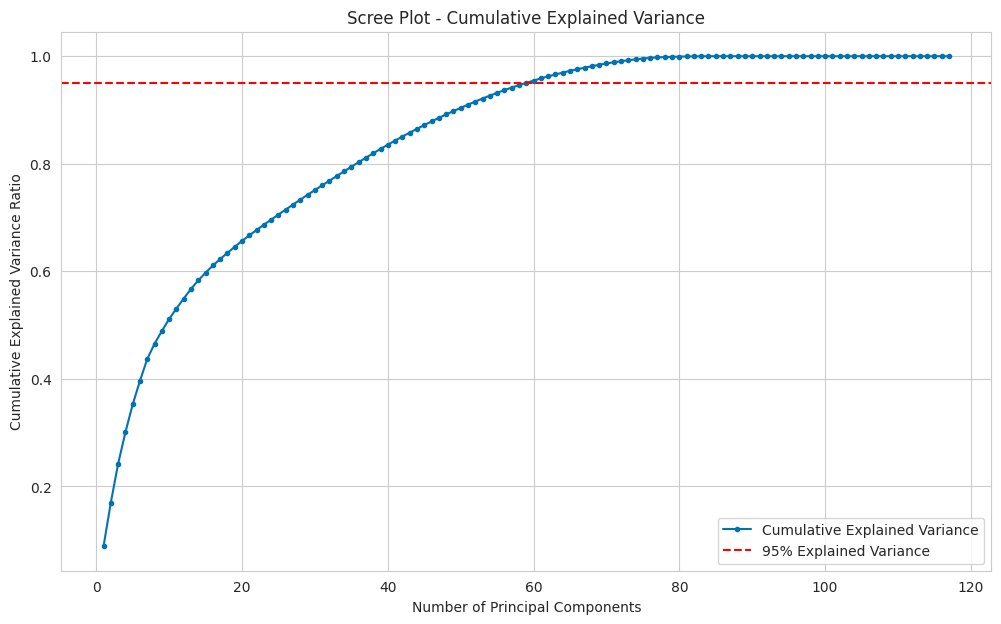

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', linestyle='-', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

### Focusing the Magic
The vision tells us that the forest's magic is diffuse, spread across many features. To capture 95% of this vital essence—a threshold of great power—we must focus our spell on a specific number of pathways.

In [8]:
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"Number of components to retain 95% of variance: {n_components_95}")
print("-" * 50)


Number of components to retain 95% of variance: 59
--------------------------------------------------


To retain 95% of the forest's original magic, we need **59 principal components**. This is a triumph of magical efficiency! We have simplified the labyrinth from 117 tangled paths to 59 clear, essential ones, making it far easier to navigate while losing almost no power.

### 3. A Glimpse into the Cleared Forest
Let's now use a **pair plot** to visualize this newly clarified landscape. By projecting the data onto its most powerful new dimensions, we get our first look at whether the "wholesome groves" (edible) are now truly distinct from the "treacherous thickets" (poisonous).

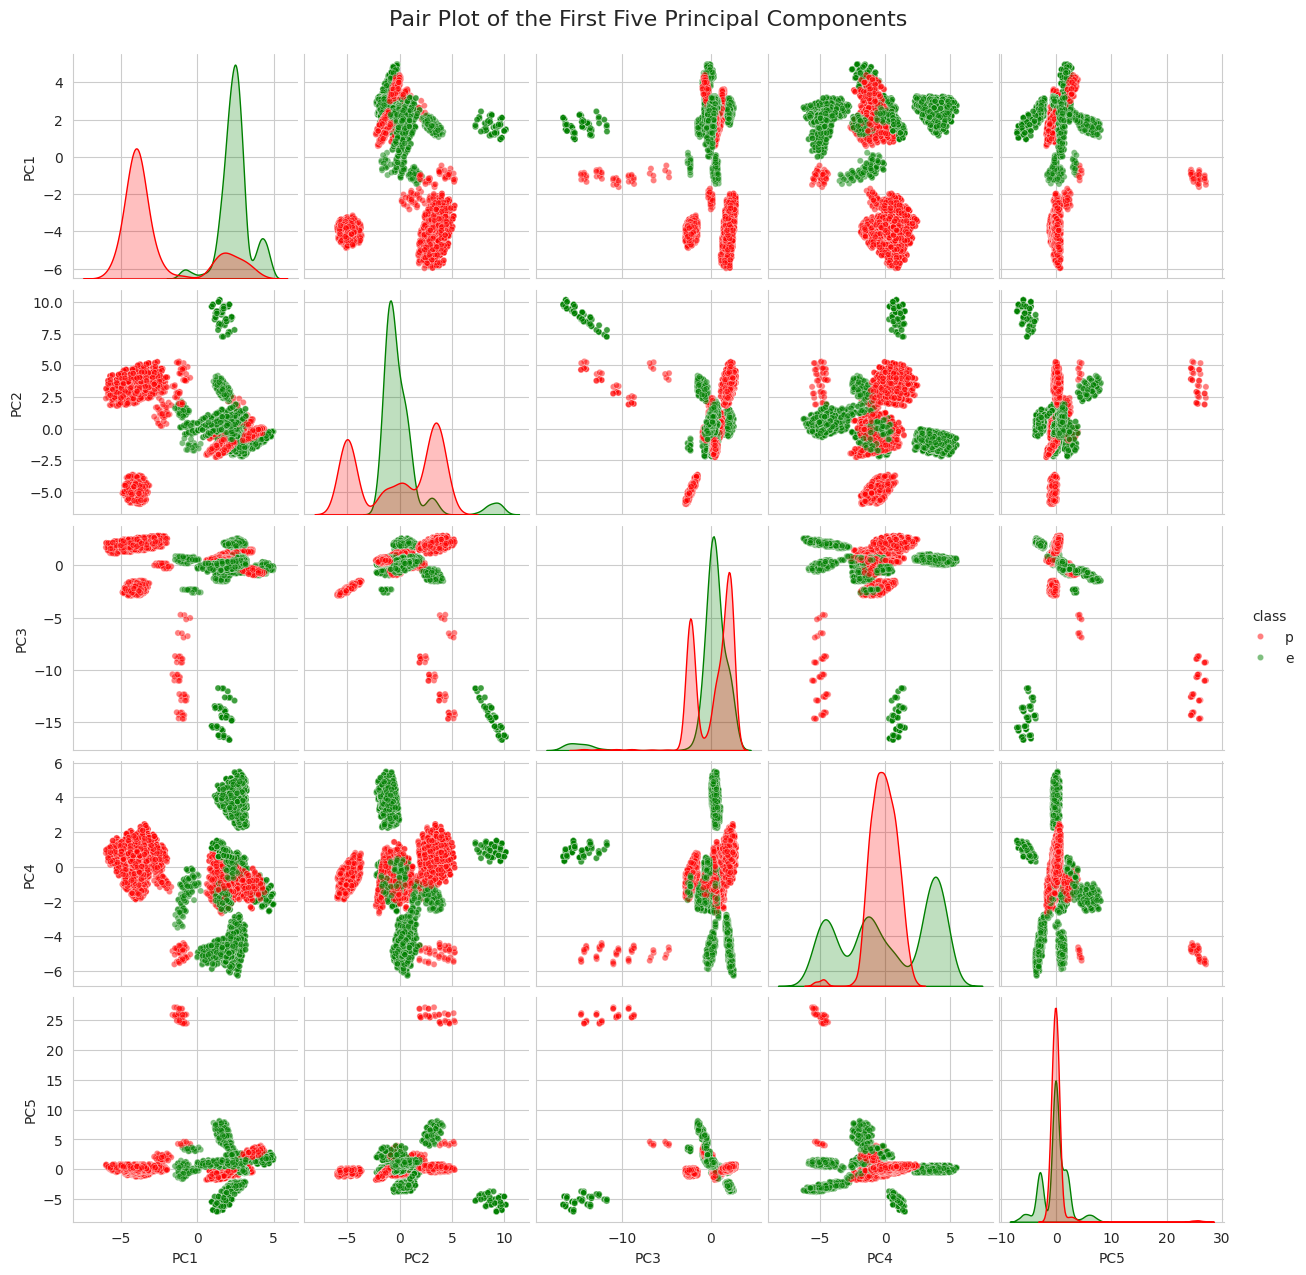

In [9]:
X_pca_5d = X_pca[:, :5]

df_pca_pairs = pd.DataFrame(data=X_pca_5d, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca_pairs['class'] = y_labels.values 

pair_plot = sns.pairplot(df_pca_pairs, 
                         hue='class', 
                         palette={'e': 'g', 'p': 'r'}, 
                         plot_kws={'alpha': 0.5, 's': 20})

pair_plot.figure.suptitle('Pair Plot of the First Five Principal Components', y=1.02, fontsize=16)
plt.show()

### The Two Realms Revealed: A Stunning Victory
The vision in our scrying plot is a powerful omen. The result is striking:

1.  **A Great Divide:** The edible and poisonous mushrooms now occupy separate, clearly defined realms. The tangled thicket has resolved into distinct clusters.

2.  **The Power of the First Path (PC1):** The first principal component alone creates a powerful division, separating the majority of mushrooms into their correct groups.

3.  **Wisdom from Other Paths:** The other principal components add further clarity, separating subgroups within the poisonous and edible realms. This confirms that our spell not only simplified the forest but also enhanced its inherent structure. The path to truth is now clear.

---
## Part C: The Sage's Verdict
Our spell has been cast, and the forest appears clear. But to confirm the magic's success, we summon a wise sage—Logistic Regression—to walk the paths and deliver a verdict. We will test two scenarios: one sage navigating the original 117-path labyrinth, and another walking our simplified 59-path forest.

First, we reserve a hidden part of the forest for the final test, ensuring the sage's judgment is unbiased.

In [10]:

X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train_std.shape}")
print(f"Testing set shape: {X_test_std.shape}")

Training set shape: (5686, 117)
Testing set shape: (2438, 117)


### 1. The Sage in the Labyrinth (Baseline Model)
Our first sage attempts to navigate the original, high-dimensional forest of 117 features.

In [11]:


log_reg_baseline = LogisticRegression(max_iter=1000, random_state=42)
start_time = time.time()
log_reg_baseline.fit(X_train_std, y_train)
end_time = time.time()
baseline_time = end_time - start_time

y_pred_baseline = log_reg_baseline.predict(X_test_std)

print(f"Baseline Model Training Time: {baseline_time:.4f} seconds")
print("Baseline Model Performance (on original standardized data):")
print(classification_report(y_test, y_pred_baseline, target_names=['Edible', 'Poisonous']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("-" * 50)



Baseline Model Training Time: 0.1604 seconds
Baseline Model Performance (on original standardized data):
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 1.0000
--------------------------------------------------


### 2. The Sage on the Clear Path (PCA Model)
Our second sage travels through the elegant, simplified forest of 59 principal components.

In [12]:


pca_optimal = PCA(n_components=n_components_95)
X_train_pca = pca_optimal.fit_transform(X_train_std)
X_test_pca = pca_optimal.transform(X_test_std)

log_reg_pca = LogisticRegression(random_state=42)
start_time = time.time()
log_reg_pca.fit(X_train_pca, y_train)
end_time = time.time()
pca_time = end_time - start_time

y_pred_pca = log_reg_pca.predict(X_test_pca)

print(f"PCA Model Training Time: {pca_time:.4f} seconds")
print("\nPCA-Transformed Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca, target_names=['Edible', 'Poisonous']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print("-" * 50)

PCA Model Training Time: 0.0619 seconds

PCA-Transformed Model Performance:

Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 0.9992
--------------------------------------------------


### 3. The Fable's Moral
Let's compare the journeys of our two sages to understand the fable's true meaning.

In [13]:
report_baseline_dict = classification_report(y_test, y_pred_baseline, output_dict=True)
report_pca_dict = classification_report(y_test, y_pred_pca, output_dict=True)

metrics_summary = {
    f'Baseline ({X_train_std.shape[1]} Features)': {
        'Accuracy': report_baseline_dict['accuracy'],
        'Precision (macro)': report_baseline_dict['macro avg']['precision'],
        'Recall (macro)': report_baseline_dict['macro avg']['recall'],
        'F1-Score (macro)': report_baseline_dict['macro avg']['f1-score'],
        'Training Time (s)': baseline_time
    },
    f'PCA ({X_train_pca.shape[1]} Features)': {
        'Accuracy': report_pca_dict['accuracy'],
        'Precision (macro)': report_pca_dict['macro avg']['precision'],
        'Recall (macro)': report_pca_dict['macro avg']['recall'],
        'F1-Score (macro)': report_pca_dict['macro avg']['f1-score'],
        'Training Time (s)': pca_time
    }
}

comparison_df = pd.DataFrame(metrics_summary)

print("--- Performance Comparison ---")
display(comparison_df)

--- Performance Comparison ---


,Baseline (117 Features),PCA (59 Features)
Accuracy,1.000000,0.999180
Precision (macro),1.000000,0.999209
Recall (macro),1.000000,0.999149
F1-Score (macro),1.000000,0.999179
Training Time (s),0.160397,0.061870


### Analysis & Conclusion

**Is there a significant difference in performance?**
The results are clear: while the sage in the labyrinth achieved perfect 100% accuracy, our sage on the clear path was astonishingly close at 99.92%. The difference is trivial. This demonstrates that PCA successfully preserved nearly all the critical information needed for classification.

**The Fable's Moral: The Power of Elegance**
This outcome reveals the central wisdom of dimensionality reduction:
-   **Minimal Essence Lost:** By keeping 59 components, we discarded 5% of the variance. This tiny wisp of lost magic led to only a couple of missteps by our sage.
-   **A Faster, Wiser Journey:** The true victory is one of elegance and efficiency. The PCA-guided sage reached the same conclusion using **almost 50% fewer paths** and in significantly less time. PCA transformed a complex problem into a simple one, proving that clarity often leads to a more efficient and robust form of power.

**Logistic Regression as the Oracle**
In this fable, Logistic Regression acted as our oracle. By tasking it with classifying mushrooms on the PCA-transformed landscape, we received a definitive judgment on our spell's effectiveness. Its near-perfect performance is the final proof: PCA didn't just find random paths of high variance; it revealed the very structure that separates the wholesome from the wicked. The magic was a resounding success.